# logRegres

In [ ]:
testSet.txt  每个样本两个特征 一共两个类别

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def loadDataSet():
    dataMat=[];labelMat=[]
    fr=open('testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()    #去除头，尾空格，按照空格分隔
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))   #标签转化为int类型
    return dataMat,labelMat

In [12]:
def sigmoid(inx):
    if inx>0:
        return 1.0/(1+np.exp(-inx))
    
    #RuntimeWarning: overflow encountered in exp return 1.0/(1+np.exp(-inx))
    else:
        return np.exp(inx)/(np.exp(inx)+1)

In [52]:
#梯度上升
#这里对于构建的线性模型的体现就在于：dataMatin*weights
#这里是就是相当于对每个样本的各个特征进行加权求和，然后得到每个样本的输出，然后将输出拿去求损失

def gradAscent(dataMatin,classlabel):
    dataMattrix=np.mat(dataMatin)   #转为矩阵数据类型  (100,3)
    labelMat=np.mat(classlabel).transpose()      #(100,1)转为(1,100)
    
    m,n=np.shape(dataMattrix)  #获取形状
    
    lr=0.001   #学习率
    
    maxCycles=500
    weights=np.mat(np.ones((n,1)))  #(3,1)
    for k in range(maxCycles):    #进行500次迭代
        y_h=sigmoid(dataMatin*weights)   #变为(m,1)的向量（该列上的每个元素都是加权求和得到的）
#         print("y_h shape",np.shape(y_h))  
        loss=labelMat-y_h    #求损失 (100,1)
#         print("loss :",loss[0])
#         print(type(loss[0]))
#         print(np.shape(loss))
#         print(loss[0][0].shape)
        #这里是对整个数据集求梯度
        weights=weights+lr*dataMattrix.transpose()*loss     #梯度上升  得到(n,1)的列向量
#         print(type(weights))
#     print("weights shape:",np.shape(weights))
    return weights

In [4]:
dataArr,labelMat=loadDataSet()

In [36]:
weights=gradAscent(dataArr,labelMat)

In [51]:
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [3]:
def plotBestFit(dataMat,labelMat,weights):
    dataArr = np.array(dataMat)
#     print("w 矩阵 shape:",weights.shape)
#     weights=weights.getA()     #array需要注释
#     print("w shape",weights.shape)
#     print(type(weights))
    n = np.shape(dataArr)[0]   #样本数
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:   #‘1’类别的点
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:   #'0'类别的点
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
#     print("x shape",x.shape)
    y = (-weights[0]-weights[1]*x)/weights[2]
#     print("y shape",y.shape)
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');



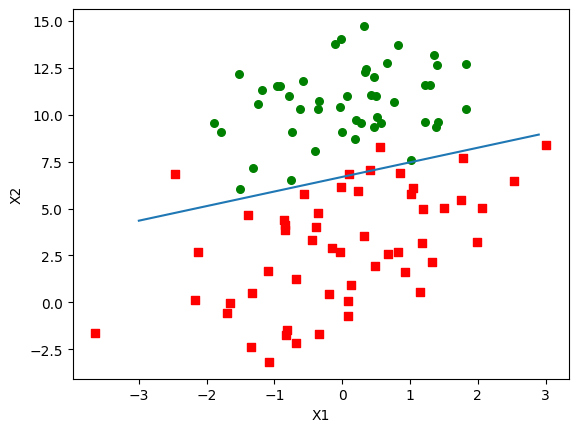

In [39]:
plotBestFit(dataArr,labelMat,weights)

In [237]:

#随机梯度上升
#随机体现在每次通过一个样本求得的损失来梯度和进行权重更新（伪随机）
#这里的批量大小是1
def stocGradAscent0(dataMat,labels):
    m,n=np.shape(dataMat)    # m, 3
    dataMat=np.array(dataMat)    #由list转换为array   逆天
    lr=0.01
    weights=np.ones(n)   #(3,)
    for i in range(m):   #对每个样本
        y_h=sigmoid(sum(dataMat[i]*weights))  #点积  对应元素相乘
        loss=labels[i]-y_h   #(1,1)
        weights=weights+lr*loss*dataMat[i]
    return weights

In [238]:
weights2=stocGradAscent0(dataArr,labelMat)

In [239]:
weights2

array([ 1.01702007,  0.85914348, -0.36579921])

In [256]:
type(weights)

numpy.matrix

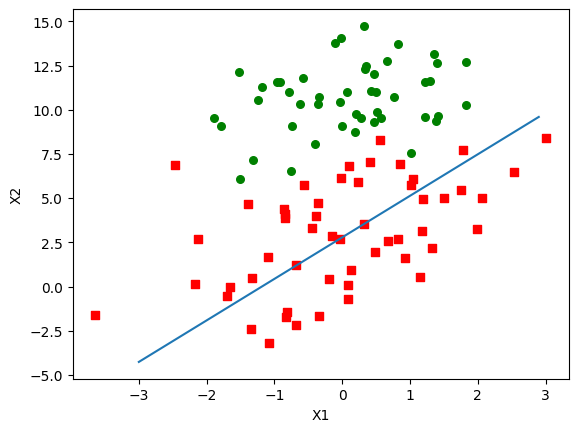

In [267]:
plotBestFit(dataArr,labelMat,weights2)

In [7]:
x=np.random.uniform(0,100)

76.83788348649145

In [4]:
#随机梯度
#随机梯度有利于减少权重 迭代时周期性的波动，以及获得更快的收敛速度。
def stocGradAscent1(dataMat,labels,numIter):
    dataMat=np.array(dataMat)
    m,n=np.shape(dataMat)
    weights=np.ones(n)    
   
    for i in range(numIter):      #进行150次迭代  
        dataIndex=list(range(m))  #对下标进行记录，保证每次
        for j in range(m):       #对于每个样本，批量大小是1
            lr=4/(1.0+i+j)+0.01     #更新lr
            randIndex=int(np.random.uniform(0,len(dataIndex)))    #随机取0-100之间的数作为下标（即随机取一个样本）
            y_h=sigmoid(sum(dataMat[randIndex]*weights))          #点积后求和
            loss=labels[randIndex]-y_h
            weights=weights+lr*loss*dataMat[randIndex]
            del(dataIndex[randIndex])
    return weights
    


In [17]:
weight3=stocGradAscent1(dataArr,labelMat,150)

In [18]:
weight3

array([13.93055819,  0.81551331, -1.98682442])

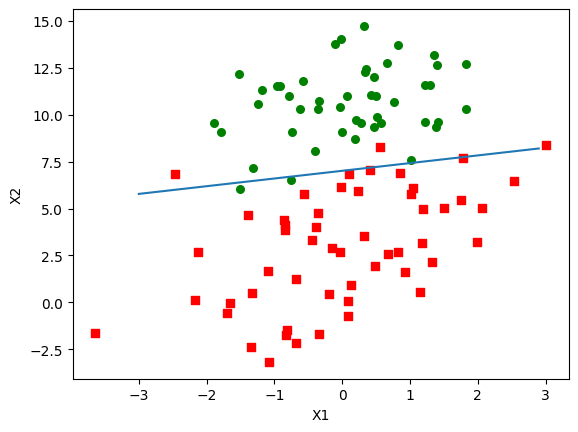

In [21]:
plotBestFit(dataArr,labelMat,weight3)

In [16]:
#进行预测
def classifyVector(inX,weights):
    inX=np.array(inX)    
    prob=sigmoid(sum(inX*weights))
    if prob>0.5:
        return 1.0
    else:
        return 0.0
    
#读取并处理数据集，并进行单次验证
def colicTest():
    frTrain=open('horseColicTraining.txt')
    frTest=open('horseColicTest.txt')
    
    trainingSet=[]
    trainingLabels=[]
    
    #逐行读取数据并进行特征和标签的分离
    for line in frTrain.readlines():
        currLine=line.strip().split('\t')
#         print(len(currLine))
        lineArr=[]
        
        for i in range(21):
            lineArr.append(float(currLine[i]))
        
        #获取数据集
        trainingSet.append(lineArr)
#         print("trainSet_shape:",np.shape(trainingSet))
        trainingLabels.append(float(currLine[21]))    #转为int类型
    
#     print("trainSet:",trainingSet)
#     print("trainlabels",trainingLabels)
    #迭代次数：500
    trainWeights=stocGradAscent1(trainingSet,trainingLabels,500)
    
    print("weights shape:",np.shape(trainWeights))
    accCount=0
    errCount=0
    numTestvec=0.0   #float
    
    #测试集
    for line in frTest.readlines():
        numTestvec+=1.0
        currLine=line.strip().split('\t')
        lineArr=[]
        
        for i in range(21):
            lineArr.append(float(currLine[i]))
        
        if int(classifyVector(lineArr,trainWeights)==int(currLine[21])):
            accCount+=1
        if int(classifyVector(lineArr,trainWeights)!=int(currLine[21])):
            errCount+=1
    
    accRate=(float(accCount)/numTestvec)
    errRate=(float(errCount)/numTestvec)
    
    print("The test acc is :",accRate)
    print("The test err is :",errRate)
    return accRate,errRate
    

In [7]:
single_result=colicTest()

weights shape: (21,)
The test acc is : 0.6417910447761194


In [11]:
single_result_overflow=colicTest()

C:\Users\china\AppData\Local\Temp\ipykernel_24844\251321274.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-inx))


weights shape: (21,)
The test acc is : 0.6865671641791045


In [18]:
single_result_acc_err=colicTest()

weights shape: (21,)
The test acc is : 0.6865671641791045
The test err is : 0.31343283582089554


In [54]:
print(type(single_result))

<class 'int'>


In [20]:
def multiter():
    numTests=10
    accSum=0.0
    errSum=0.0
    
    for k in range(numTests):
        t1,t2=colicTest()
        accSum+=t1
        errSum+=t2
    print(f"after{numTests} iterations the average acc is:{accSum/float(numTests)}")
    print(f"after{numTests} iterations the average err is:{errSum/float(numTests)}")

In [56]:
#overflow
multiter()

C:\Users\china\AppData\Local\Temp\ipykernel_26548\2301828707.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-inx))


weights shape: (21,)
The test acc is : 0.5522388059701493
weights shape: (21,)
The test acc is : 0.6716417910447762
weights shape: (21,)
The test acc is : 0.5970149253731343
weights shape: (21,)
The test acc is : 0.582089552238806
weights shape: (21,)
The test acc is : 0.6716417910447762
weights shape: (21,)
The test acc is : 0.6119402985074627
weights shape: (21,)
The test acc is : 0.5671641791044776
weights shape: (21,)
The test acc is : 0.7014925373134329
weights shape: (21,)
The test acc is : 0.5223880597014925
weights shape: (21,)
The test acc is : 0.7313432835820896
<class 'float'>
6.208955223880596
after10 iterations the average acc is:0.6208955223880597


In [15]:
#no overflow
multiter()

weights shape: (21,)
The test acc is : 0.6417910447761194
weights shape: (21,)
The test acc is : 0.6119402985074627
weights shape: (21,)
The test acc is : 0.5522388059701493
weights shape: (21,)
The test acc is : 0.6417910447761194
weights shape: (21,)
The test acc is : 0.6417910447761194
weights shape: (21,)
The test acc is : 0.582089552238806
weights shape: (21,)
The test acc is : 0.7611940298507462
weights shape: (21,)
The test acc is : 0.7164179104477612
weights shape: (21,)
The test acc is : 0.6119402985074627
weights shape: (21,)
The test acc is : 0.5671641791044776
<class 'float'>
6.328358208955224
after10 iterations the average acc is:0.6328358208955225


In [21]:
multiter()

weights shape: (21,)
The test acc is : 0.6716417910447762
The test err is : 0.3283582089552239
weights shape: (21,)
The test acc is : 0.6865671641791045
The test err is : 0.31343283582089554
weights shape: (21,)
The test acc is : 0.5970149253731343
The test err is : 0.40298507462686567
weights shape: (21,)
The test acc is : 0.6119402985074627
The test err is : 0.3880597014925373
weights shape: (21,)
The test acc is : 0.7014925373134329
The test err is : 0.29850746268656714
weights shape: (21,)
The test acc is : 0.6865671641791045
The test err is : 0.31343283582089554
weights shape: (21,)
The test acc is : 0.47761194029850745
The test err is : 0.5223880597014925
weights shape: (21,)
The test acc is : 0.6716417910447762
The test err is : 0.3283582089552239
weights shape: (21,)
The test acc is : 0.6119402985074627
The test err is : 0.3880597014925373
weights shape: (21,)
The test acc is : 0.6268656716417911
The test err is : 0.373134328358209
after10 iterations the average acc is:0.634328